In [304]:
# Initial imports
import os
import requests
import urllib3
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from bs4 import BeautifulSoup
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
http = urllib3.PoolManager()

%matplotlib inline

In [305]:
# Load .env enviroment variables
load_dotenv()

True

<h2> Personal Finance Planner

In [306]:
# Set current amount of crypto assets
currency_data = {
    "shares": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame
df_currency = pd.DataFrame(currency_data, index=tickers)

# Display shares data
df_currency

,shares
BTC,1.2
ETH,5.3


In [307]:
# Fetch current BTC price
response = http.request('GET', 'https://www.coingecko.com/en/coins/bitcoin')
btc_string = BeautifulSoup(response.data,features="lxml")  
btc_string = str(btc_string)
btc_string = btc_string[btc_string.find('{"@type":"Offer","price":"'):btc_string.find('","priceCurrency":"USD"}}')]
my_btc = float(btc_string[26:])
print(my_btc)


13175.388161344685


In [308]:
# Fetch current ETH price
response = http.request('GET', 'https://www.coingecko.com/en/coins/ethereum')
eth_string = BeautifulSoup(response.data,features="lxml") 
eth_string = str(eth_string)
eth_string = eth_string[eth_string.find('{"@type":"Offer","price":"'):eth_string.find('","priceCurrency":"USD"}}')]
my_eth = float(eth_string[26:])
print(my_eth)



384.65088870170445


In [309]:
# Compute current value of my crpto
my_btc_value = my_btc * df_currency.loc["BTC"]["shares"]
my_eth_value = my_eth * df_currency.loc["ETH"]["shares"]
my_currency_value = (my_btc_value + my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your BTC is ${my_btc_value:0.2f}")
print(f"The current value of your ETH is ${my_eth_value:0.2f}")
print(f"Total currency value: ${my_currency_value:0.2f}")

The current value of your BTC is $15810.47
The current value of your ETH is $2038.65
Total currency value: $17849.12


In [310]:
# Current amount of shares
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [311]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [312]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high     low   close   volume   open   
2020-10-28 00:00:00-04:00  117.81  117.955  117.72  117.73  5448671  332.1   

                                                                
                               high     low   close     volume  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.67  107939571

In [313]:
# Pick AGG and SPY close prices
my_agg = float(df_portfolio["AGG"]["close"])
my_spy = float(df_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${my_agg}")
print(f"Current SPY closing price: ${my_spy}")


Current AGG closing price: $117.73
Current SPY closing price: $326.67


In [318]:
# Compute the current value of shares
my_agg_value = my_agg * df_shares.loc["AGG"]["shares"]
my_spy_value = my_spy * df_shares.loc["SPY"]["shares"]
my_stock_value = (my_agg_value + my_spy_value)


# Print current value of share
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${my_spy_value:0.2f}")
print(f"Total stocks: ${my_stock_value:0.2f}")

The current value of the 200 AGG shares is $23546.00
The current value of the 50 SPY shares is $16333.50
Total stocks: $39879.50


In [367]:
# Set monthly household income
monthly_income = 12000
savings = (my_currency_value + my_stock_value)

# Create savings DataFrame
savings_data = {'Type': ['Crypto', 'Stock'], 'Amount': [my_currency_value, my_stock_value]}

# Create a DataFrame with the current value of shares
df_savings = pd.DataFrame(savings_data, columns = ['Type', 'Amount'])

# Display DataFrame data
df_value


,CRYPTO,STOCKS
0,17849.115504,39879.5


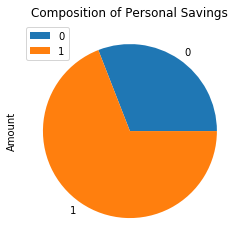

In [368]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [390]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

if savings > emergency_fund:
    print('Congratulations, you have money!')
elif savings == emergency_fund:
    print('You broke even')
else:
    print({savings-emergency_fund})

# Calculate total amount of savings
print(f"${savings:0.2f}")

# Vaidate saving health
print({savings-emergency_fund})


Congratulations, you have money!
$57728.62
{21728.615503732653}


<h2> Retirement Planning

In [394]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2016-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-28", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                        \
                             open      high       low    close   volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   

                              SPY                                    
                             open    high     low   close    volume  
2016-05-02 00:00:00-04:00  206.92  208.18  206.41  207.97  52152807  
2016-05-03 00:00:00-04:00  206.52  206.80  205.28  206.15  79397652  
2016-05-04 00:00:00-04:00  204.99  205.85  204.42  204.99  73747383  
2016-05-05 00:00:00-04:00  205.56  205.98  204.47  204.98  58322810  
2016-05-06 00:00:00-04:00  204.06  205.77  203.88  205.70  69458860

In [399]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30)

In [400]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-05-02 00:00:00-04:00          NaN  206.92  208.18  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.80  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.85  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.98  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.77  203.88  205.70   

                                                  
                             volume daily_return  
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513

In [401]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006104,0.998698,1.000296,1.001568,0.998081,1.004488,0.998691,0.999834,1.002064,0.994509,...,0.999912,0.997025,1.003557,1.002312,0.994077,1.008417,1.006319,0.999278,1.001998,1.001390
2,1.002502,0.991592,1.004790,0.999148,1.000264,1.005619,0.998815,1.002421,1.006030,0.995035,...,0.997677,0.993442,1.000408,0.999538,0.981023,1.013684,1.012249,1.007679,0.993080,1.002561
3,1.003448,0.992564,1.003382,1.007251,1.002544,1.007009,0.987395,1.001305,1.009123,0.990814,...,0.993574,0.994496,0.986917,0.997095,0.987598,1.015680,1.010531,1.009994,0.996344,0.999519
4,1.001109,0.989101,0.994237,1.008875,1.013636,1.003829,0.985996,1.004976,1.011982,0.985024,...,0.997947,0.993308,0.975197,0.997080,0.997228,1.020778,1.001247,1.014185,0.993080,1.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.174366,3.918012,4.599776,5.066138,6.928701,10.403878,5.557059,9.030150,5.903955,3.500941,...,1.992840,12.441752,2.842561,5.343942,6.483941,2.605811,9.840634,5.030464,3.982881,8.085604
7557,3.211744,3.904247,4.594479,5.069473,6.907490,10.489863,5.599114,9.111849,5.886681,3.505004,...,1.994968,12.417276,2.833255,5.384613,6.503974,2.611565,9.751637,5.000371,3.991600,8.133187
7558,3.196071,3.900201,4.591537,5.101080,6.869522,10.453421,5.578913,9.107058,5.834908,3.497511,...,1.989087,12.273413,2.834353,5.400342,6.466400,2.588439,9.791005,5.021220,3.976050,8.118593
7559,3.184700,3.905298,4.517178,5.099226,6.870319,10.467206,5.599111,9.071797,5.843503,3.485731,...,1.994432,12.263924,2.836468,5.443494,6.514709,2.600276,9.838426,5.037998,3.990672,8.086819


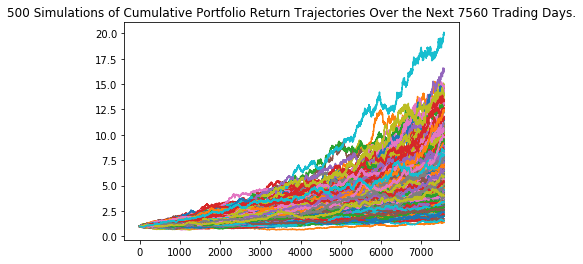

In [402]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

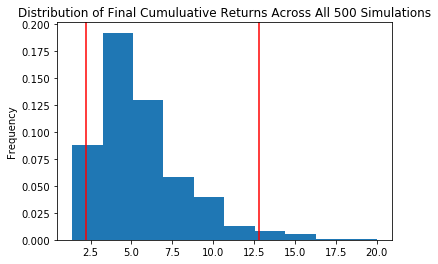

In [403]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

In [404]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.593393
std               2.744352
min               1.372151
25%               3.636367
50%               4.999803
75%               6.780193
max              19.991752
95% CI Lower      2.194111
95% CI Upper     12.790933
Name: 7560, dtype: float64


In [405]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43882.22 and $255818.66


In [406]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65823.33 and $383728.0
